In [28]:
# import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
dir = "../"

In [30]:
def getValues(index):
    name = "c_5r7_" + str(index)
    file_name = dir + name + ".histo"
    f = open(file_name, "r")
    ranges = []
    result = []

    for line in f:
        range, freq = line.strip().split(" ")
        ranges.append(range)
        result.append(int(freq))
        
    f.close()
    return ranges, result, name

In [31]:
def getDF(max, formatter):
    dfs = dict()
    categories = []
    for iteration in range(0, max):
        cat, result, name = getValues(iteration)
        categories = formatter(cat)
        dfs[name] = formatter(result)
        
    dfs["ranges"] = categories
        
    return pd.DataFrame(dfs)

In [35]:
dfs = getDF(6, formatter=lambda x: list(x)[:3])
dfs

,c_5r7_0,c_5r7_1,c_5r7_2,c_5r7_3,c_5r7_4,c_5r7_5,ranges
0,27,8,2,3,0,0,neg
1,4,10,2,0,0,0,0.030000
2,5,6,3,4,2,2,0.050000


In [33]:
def plotDF(df):
    ax = df.plot.bar(rot=0, width=0.8, figsize=(10, 5), x="ranges",  title="Elementos por refinar por threshold para primeras 5 iteraciones", ylabel="Frecuencia elementos de mala calidad", xlabel="Threshold")
    for container in ax.containers:
        ax.bar_label(container, padding=3)

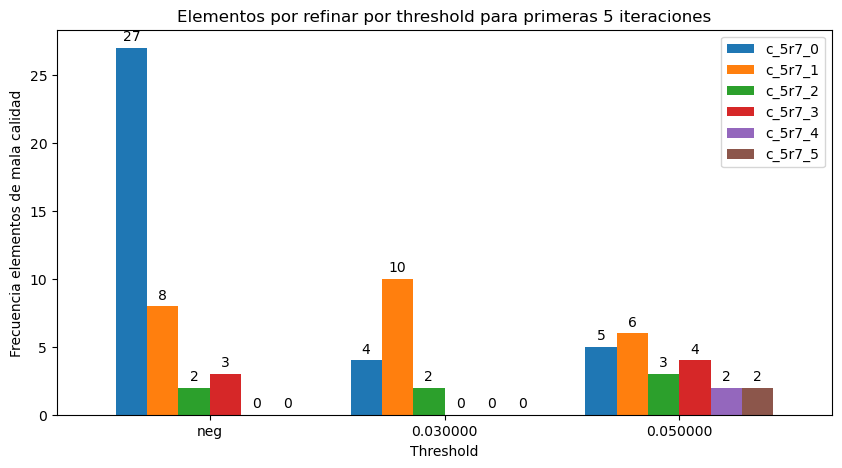

In [34]:
plotDF(dfs)